# Angular TSP Experiment Evaluation

We work on a simplified list. Much more data is available.

- Experiments were executed with a 3600s time limit on algpc02

In [4]:
import json
import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme()
plt.rcParams.update({'figure.max_open_warning': 0
                    ,"text.usetex": True
                    ,"font.family": "serif"
                    })
sns.set_palette("tab10")
PAPER_WIDTH = 10

## Explaining the data

In [5]:
t_experiments = pd.read_json("./00_angular_data.json.zip")

* **num_vertices:** The number of vertices in this instance. Most of the instances have been created in 5-steps.
* **sparsification_technique:** The used sparsification technique. The complete graph has "complete".
* **ObjVal:** The objective value of the solution (either optimal or the best at timeout).
* **filename_instance:** The file of the instance. Use this to distinguish different instances. The name also states something about its properties.
* **Runtime:** The runtime in seconds. The time limit has been 3600s.
* **Status:** The status code. 2 means solved to optimality. For sparisified instances, the instance may be solved in time but infeasible.
* **ObjBound:** The lower bound. If Status==2, it should equal the ObjVal.
* **solver:** Just the name of the solver. Not of relevance.
* **GRB_OUT_Time:** A list with the corresponding times the of the next two lists.
* **GRB_OUT_BestBd:** A list of the best bounds obtained over time (at the time of the previous list)
* **GRB_OUT_Incumbent:** A list of the best solutions (ObjVal) over time (analogous to previous list).

In [6]:
t_experiments

,num_vertices,sparsification_technique,ObjVal,filename_instance,Runtime,Status,ObjBound,solver,GRB_OUT_Time,GRB_OUT_BestBd,GRB_OUT_Incumbent
23,45,complete,26863.116543,20210429_normal_45_1.json,30.635413,2,26863.116543,Angle_tsp,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 10.0, 11.0...","[24339.9527, 24339.9527, 24422.9115, 24422.911...","[41380.4378, 37733.376484, 37733.3741, 37733.3..."
54,55,complete,30281.065056,20210429_normal_55_5.json,175.627452,2,30281.065056,Angle_tsp,"[2.0, 4.0, 5.0, 9.0, 11.0, 15.0, 20.0, 31.0, 3...","[28413.4902, 28445.7403, 28467.0795, 28467.079...","[43353.9319, 37483.455, 36427.4724, 36427.4724..."
135,30,complete,21190.743562,20210429_normal_30_6.json,3.795149,2,21190.743562,Angle_tsp,"[0.0, 1.0, 3.0]","[19082.6363, 19667.297, 20315.8242]","[27933.2907, 21202.701835, 21190.743562]"
221,30,complete,20346.380016,20210429_normal_30_9.json,1.620536,2,20346.380016,Angle_tsp,"[0.0, 1.0]","[19142.8331, 20281.8109]","[25565.8852, 20346.380016]"
272,10,complete,9898.638319,20210429_normal_10_0.json,0.016078,2,9898.638319,Angle_tsp,[0.0],[9843.0464],[9898.638319]
...,...,...,...,...,...,...,...,...,...,...,...
25554,20,yao6-2,15895.086080,20210430_uniform_real_20_6.json,0.060740,2,15895.086080,Angle_tsp,[0.0],[15671.2548],[15895.08608]
25628,70,yao6-2,45859.774159,20210501_uniform_real_70_7.json,10.135095,2,45859.774159,Angle_tsp,"[0.0, 1.0, 2.0, 4.0, 5.0, 10.0]","[39637.7508, 39858.9431, 40678.0038, 42576.322...","[48320.0878, 46754.894858, 46493.332569, 45859..."
25793,25,yao6-2,17026.668661,20210430_uniform_real_25_1.json,0.028778,2,17026.668661,Angle_tsp,[0.0],[17026.6687],[17026.668661]
25825,60,yao6-2,41085.878110,20210430_uniform_real_60_9.json,10.522912,2,41085.878110,Angle_tsp,"[0.0, 1.0, 2.0, 3.0, 5.0, 10.0]","[34678.8112, 35582.4026, 35886.5426, 37343.785...","[41872.070473, 41544.755356, 41348.309568, 410..."


## 1. Feasibility

Do the sparsification techniques actually yield feasible instances?

For smaller instances, it can easily happen. So we only consider instances with at least 30 vertices.

In [7]:
only_larger_than = 30
num_instances = t_experiments[(t_experiments["num_vertices"]>=only_larger_than)]["filename_instance"].nunique()
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
t

sparsification_technique
greedy2     0.996667
theta6-0    0.356667
theta6-1    0.403333
wspd2-1     0.026667
wspd2-2     0.010000
wspd3-1     0.106667
wspd4-1     0.133333
wspd5-1     0.153333
wspd6-1     0.176667
wspd7-1     0.183333
wspd8-1     0.186667
yao6-0      0.296667
yao6-1      0.343333
Name: filename_instance, dtype: float64

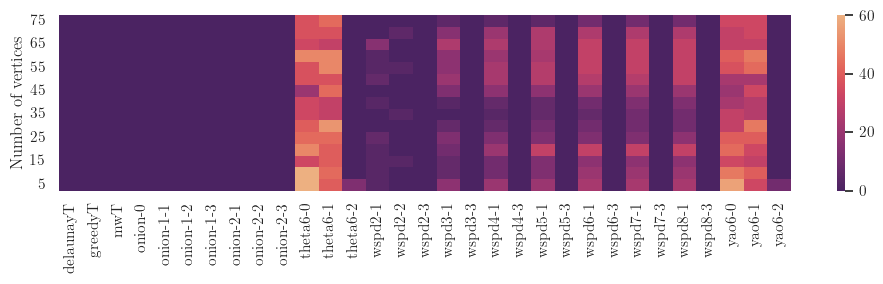

In [8]:
fig = plt.figure(figsize=(PAPER_WIDTH,3))
t = t_experiments.copy()
t["Infeasible"] = (t["Status"]==3).apply(lambda x: 100 if x else 0)
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Infeasible"].mean().reset_index()
#t_=t_[t_["sparsification_technique"]!="greedy2"]
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    if s=="complete" or s=="greedy2":
        continue
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Infeasible"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True)
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
#plt.title("Brighter is worse.")
plt.tight_layout()
plt.savefig("./output/feasibility.pdf")
plt.show()

As we see above, the infeasible instances are relatively independent of the size.

Let us ignore the following sparsification techniques, because more than 10% of them are infeasible (non-hamiltonian).

In [9]:
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
techniques_to_ignore = list(t[t>0.1].index)
techniques_to_ignore

['greedy2',
 'theta6-0',
 'theta6-1',
 'wspd3-1',
 'wspd4-1',
 'wspd5-1',
 'wspd6-1',
 'wspd7-1',
 'wspd8-1',
 'yao6-0',
 'yao6-1']

In [10]:
t_experiments_feasible = t_experiments[~t_experiments["sparsification_technique"].isin(techniques_to_ignore)]

## 2. Solution Quality

Let us next look at the solution quality because bad solutions are not useful independent of how quick we can obtain them.

We are using *best upper bound/best lower bound* as metric (all bounds computed with timeout).

In [11]:
t = t_experiments_feasible.copy()
t = t[t["Status"]!=3]
lbs = t_experiments[t_experiments["sparsification_technique"]=="complete"].groupby("filename_instance")["ObjBound"].max()
t = pd.merge(left=t, right=lbs, left_on="filename_instance", right_index=True, suffixes=("", "_best"))
t["Gap"] = t["ObjVal"]/t["ObjBound_best"]

In [12]:
t[t["Gap"]<=0.99]

,num_vertices,sparsification_technique,ObjVal,filename_instance,Runtime,Status,ObjBound,solver,GRB_OUT_Time,GRB_OUT_BestBd,GRB_OUT_Incumbent,ObjBound_best,Gap


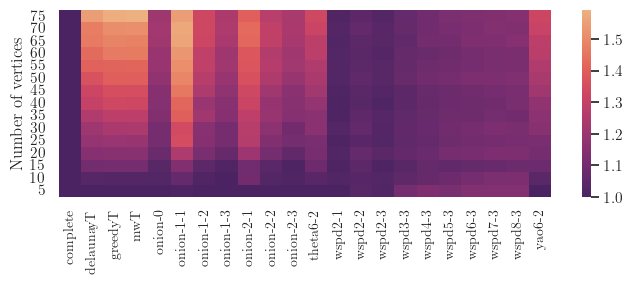

In [13]:
fig = plt.figure(figsize=(0.7*PAPER_WIDTH,3))
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Gap"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Gap"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, yticklabels=True)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
#plt.title("Brighter is worse.")
plt.tight_layout()
plt.savefig("./output/solution_quality_heatmap.pdf")
plt.show()

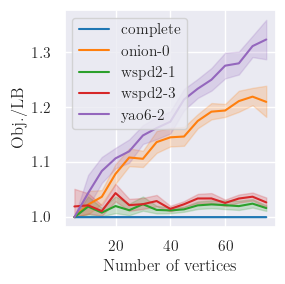

In [14]:
fig = plt.figure(figsize=(0.3*PAPER_WIDTH,3))
detail_sparsification_techniques = ["complete", "onion-0", "wspd2-1", "wspd2-3", "yao6-2"]
t_ = t[t["sparsification_technique"].isin(detail_sparsification_techniques)]
sns.lineplot(data=t_, x="num_vertices", y="Gap", hue="sparsification_technique")
plt.legend(title="")
plt.xlabel("Number of vertices")
#plt.title("Lower is better.")
plt.tight_layout()
plt.ylabel("Obj./LB")
plt.savefig("./output/solution_quality_lineplot.pdf")
plt.show()

In [15]:
detail_sparsification_techniques = ["complete", "onion-0", "wspd2-1", "wspd2-3", "yao6-2"]
t_ = t[t["sparsification_technique"].isin(detail_sparsification_techniques)]
t_.groupby(["sparsification_technique"])["Gap"].mean()

sparsification_technique
complete    1.000001
onion-0     1.128552
wspd2-1     1.016393
wspd2-3     1.026203
yao6-2      1.176388
Name: Gap, dtype: float64

We see that within the time limit of 3600 seconds, the complete graph actually computes the best solutions, even if they are not optimal. The wspd-graphs are still reasonably close to the optimum.

When we take a look at the objective value after 15 seconds, the wspd have some advantage.

In [16]:
seconds = 15
gap_for_no_solution = 2
column_name = f"ObjAfter{seconds}s"
column_name_gap = f"RelativeGapAfter{seconds}s"

def objective_at_time(instance, technique, time):
    t_ = t[(t["filename_instance"]==instance) & (t["sparsification_technique"]==technique)]
    row = t_.iloc[0]
    times = row["GRB_OUT_Time"]
    if type(times) is not list:
        return None
    objectives = row["GRB_OUT_Incumbent"]
    return min((objectives[i] for i, time_ in enumerate(times) if time_<=time), default=None)

def fill(row):
    try:
        return objective_at_time(row["filename_instance"], "complete", seconds)
    except IndexError or KeyError:
        #print("No value for", row["filename_instance"])
        return None

t[column_name]=t.apply(fill, axis=1)
t[column_name_gap]=t[column_name]/t["ObjBound_best"]
t[column_name_gap].fillna(gap_for_no_solution, inplace=True)

Text(55.22049813741006, 0.5, 'Number of vertices')

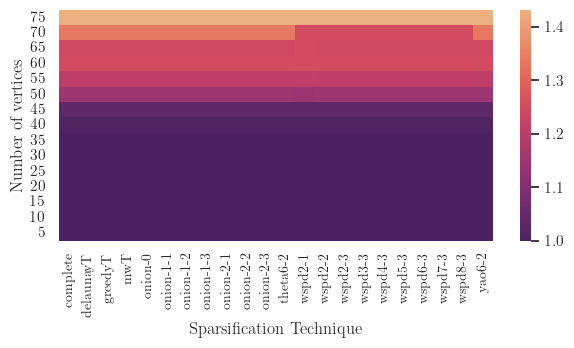

In [17]:
fig = plt.figure(figsize=(0.7*PAPER_WIDTH,3))
t_ = t.groupby(["num_vertices", "sparsification_technique"])[column_name_gap].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")[column_name_gap].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, yticklabels=True)
plt.xlabel("Sparsification Technique")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
#plt.title("Brighter is worse.")

## 2. Runtime

Let us next take a look on the runtime. We are comparing a lot of different strategies which are too much for a lineplot. Instead we do a heatmap that shows us, which instances could still be solved wihtin a strict time limit. Infeasible instances are considered as unsolved (they are slightly worse but in both cases we do not obtain the desired solution from the sparsification).

From this heatmap, we select a few intersting strategies for which we then also compare the concrete runtime in a lineplot.

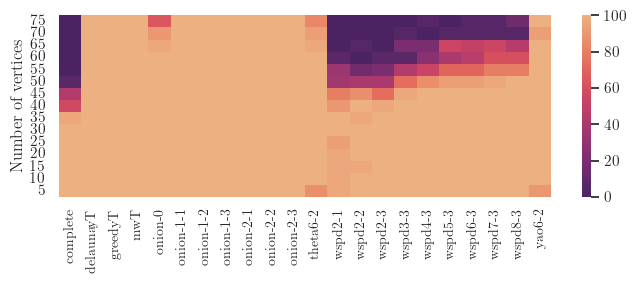

In [18]:
TIMEOUT_AFTER_S = 30
fig = plt.figure(figsize=(0.7*PAPER_WIDTH,3))

t = t_experiments_feasible.copy()
t["timeout"] = (t["Runtime"]>TIMEOUT_AFTER_S).apply(lambda x: 0 if x else 100)
t.loc[t["Status"]!=2, "timeout"]=0
t_ = t.groupby(["num_vertices", "sparsification_technique"])["timeout"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["timeout"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, yticklabels=True, vmin=0)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
#plt.title(f"Solved within {TIMEOUT_AFTER_S}s. Brighter is better.")
plt.tight_layout()
plt.savefig("./output/runtime_heatmap.pdf")
plt.show()

/tmp/ipykernel_9281/1759892056.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=t_, x="num_vertices", y="Runtime", hue="sparsification_technique", style="sparsification_technique",ci=None)


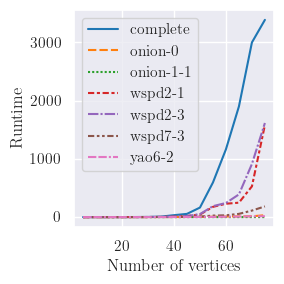

In [19]:
INTERESTING_STRATEGIES = ["complete","onion-0", "onion-1-1", "wspd7-3", "yao6-2",  "wspd2-1", "wspd2-3",]
fig = plt.figure(figsize=(0.3*PAPER_WIDTH,3))
t_ = t[t["sparsification_technique"].isin(INTERESTING_STRATEGIES)]
sns.lineplot(data=t_, x="num_vertices", y="Runtime", hue="sparsification_technique", style="sparsification_technique",ci=None)
plt.legend(title="")
plt.xlabel("Number of vertices")
plt.tight_layout()
plt.savefig("./output/runtime_lineplot.pdf")
plt.show()

In [20]:
fig = plt.figure(figsize=(0.7*PAPER_WIDTH,4))

t = t_experiments_feasible.copy()
t["timeout"] = (t["Runtime"]>TIMEOUT_AFTER_S).apply(lambda x: 0 if x else 1)
t.loc[t["Status"]!=2, "Runtime"]=3600
t_ = t.groupby(["sparsification_technique"])["Runtime"].mean().reset_index()
t_


,sparsification_technique,Runtime
0,complete,561.417684
1,delaunayT,1.409658
2,greedyT,0.840596
3,mwT,0.874041
4,onion-0,5.531720
5,onion-1-1,0.045018
6,onion-1-2,0.401707
7,onion-1-3,0.988684
8,onion-2-1,0.088652
9,onion-2-2,0.366635


<Figure size 700x400 with 0 Axes>

The onion-hulls are extremely fast. The lower wspd graphs are still visible faster than complete and the higher wspd graphs are much faster, but not as fast as onion.

## Quality/Time Ration

Let us compare the quality per time ratio.

In [21]:

def get_data_for_obj_time(num_vertices):
    INTERESTING_STRATEGIES = ["complete", "onion-0", "onion-1-1", "wspd7-3", "yao6-2",  "wspd2-1", "wspd2-3",]
    RANGE = list(range(0, 300))
    default_value = 3
    t = t_experiments_feasible.copy()
    t = t[t["num_vertices"]==num_vertices]
    t = t[t["sparsification_technique"].isin(INTERESTING_STRATEGIES)]
    if 3 in t["Status"].unique():
        print("WARNING: CONTAINS INFEASIBLE DATA")
    t = t[t["Status"]!=3]
    lbs = t_experiments[t_experiments["sparsification_technique"]=="complete"].groupby("filename_instance")["ObjBound"].max()
    t = pd.merge(left=t, right=lbs, left_on="filename_instance", right_index=True, suffixes=("", "_best"))
    def objective_at_time(row, time):
        times = row["GRB_OUT_Time"]
        if type(times) is not list:
            return float("inf")
        objectives = row["GRB_OUT_Incumbent"]
        return min((objectives[i] for i, time_ in enumerate(times) if time_<=time), default=float("inf"))
    relevant_times = RANGE
    data = {"strat": [], "gap": [], "time": [], "n": []}
    for i, row in t.iterrows():
        for t in relevant_times:
            data["strat"].append(row["sparsification_technique"])
            obj = objective_at_time(row, t)
            data["gap"].append(obj/row["ObjBound_best"] if obj<float("inf") else default_value)
            data["time"].append(t)
            data["n"].append(row["num_vertices"])
    data
    return data

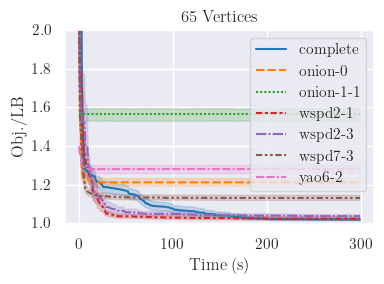

In [22]:
t_ = pd.DataFrame(data=get_data_for_obj_time(65))
t_.sort_values(by="strat", inplace=True)
fig = plt.figure(figsize=(0.4*PAPER_WIDTH, 3))
sns.lineplot(data=t_, x="time", y="gap", hue="strat", style="strat")
plt.ylim(0.99, 2.0)
plt.legend(title=None)
plt.ylabel("Obj./LB")
plt.xlabel("Time (s)")
plt.title("65 Vertices")
plt.tight_layout()
plt.savefig("./output/gap_over_time_65.pdf")
plt.show()

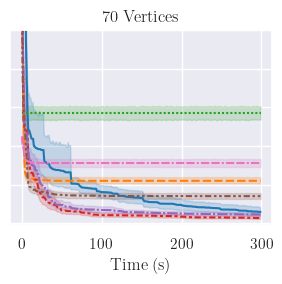

In [23]:
t_ = pd.DataFrame(data=get_data_for_obj_time(70))
t_.sort_values(by="strat", inplace=True)
fig = plt.figure(figsize=(0.3*PAPER_WIDTH, 3))
sns.lineplot(data=t_, x="time", y="gap", hue="strat", style="strat")
plt.ylim(0.99, 2.0)
plt.gca().get_legend().remove()
plt.ylabel("")
plt.xlabel("Time (s)")
plt.title("70 Vertices")
plt.gca().set_yticklabels([])
plt.tight_layout()
plt.savefig("./output/gap_over_time_70.pdf")
plt.show()

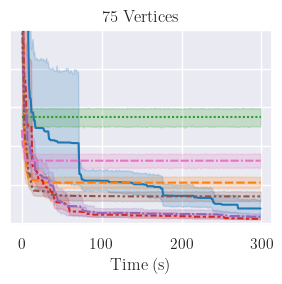

In [24]:
t_ = pd.DataFrame(data=get_data_for_obj_time(75))
t_.sort_values(by="strat", inplace=True)
fig = plt.figure(figsize=(0.3*PAPER_WIDTH, 3))
sns.lineplot(data=t_, x="time", y="gap", hue="strat", style="strat")
plt.ylim(0.99, 2.0)
plt.gca().get_legend().remove()
plt.ylabel("")
plt.xlabel("Time (s)")
plt.title("75 Vertices")
plt.gca().set_yticklabels([])
plt.tight_layout()
plt.savefig("./output/gap_over_time_75.pdf")
plt.show()